In [23]:
import pandas as pd
import pathlib

BASE_DIR = pathlib.Path.cwd().parent.resolve()
BASE_DIR

WindowsPath('C:/Users/EXNOsjulio/Documents/Practica-1')

In [24]:
from pathlib import Path

def export_corpus(df, base_dir, corpus_falso_list, corpus_verdadero_list, write_txt=False):
    base_dir.mkdir(parents=True, exist_ok=True)
    # CSV (mantener)
    df[~df['label']].to_csv(base_dir / 'falso_corpus.csv', index=False)
    df[df['label']].to_csv(base_dir / 'verdadero_corpus.csv', index=False)

    if write_txt:
        with open(base_dir / 'falso_corpus.txt', 'w', encoding='utf-8') as f:
            for x in corpus_falso_list:
                f.write(x.replace('\n', ' ') + '\n')
        with open(base_dir / 'verdadero_corpus.txt', 'w', encoding='utf-8') as f:
            for x in corpus_verdadero_list:
                f.write(x.replace('\n', ' ') + '\n')

In [25]:
corpus_falso: list[str] = []
corpus_verdadero: list[str] = []

# DF1
https://www.kaggle.com/datasets/arseniitretiakov/noticias-falsas-en-espaol/

In [26]:
onlyfakes100 = pd.read_csv(BASE_DIR / 'data/raw_corpus/onlyfakes1000.csv')
onlytrue100 = pd.read_csv(BASE_DIR / 'data/raw_corpus/onlytrue1000.csv')
corpus_falso.extend(onlyfakes100['text'].tolist())
corpus_verdadero.extend(onlytrue100['text'].tolist())
print(f"Noticias falsas: {len(corpus_falso)}, Noticias verdaderas: {len(corpus_verdadero)}")

Noticias falsas: 1000, Noticias verdaderas: 1000


# DF2
https://www.kaggle.com/datasets/zulanac/fake-and-real-news

In [27]:
spanishFakeNews = pd.read_csv(BASE_DIR / 'data/raw_corpus/spanishFakeNews.csv')
corpus_falso.extend(spanishFakeNews[spanishFakeNews['clase'] == 'fake']['texto'].tolist())
corpus_verdadero.extend(spanishFakeNews[spanishFakeNews['clase'] == 'real']['texto'].tolist())
print(f"Noticias falsas: {len(corpus_falso)}, Noticias verdaderas: {len(corpus_verdadero)}")

Noticias falsas: 1233, Noticias verdaderas: 1305


In [28]:
spanishFakeNews2 = pd.read_csv(BASE_DIR / 'data/raw_corpus/testSpanishFakeNews.csv')
corpus_falso.extend(spanishFakeNews2[spanishFakeNews2['clase'] == 'fake']['texto'].tolist())
corpus_verdadero.extend(spanishFakeNews2[spanishFakeNews2['clase'] == 'real']['texto'].tolist())
print(f"Noticias falsas: {len(corpus_falso)}, Noticias verdaderas: {len(corpus_verdadero)}")

Noticias falsas: 1259, Noticias verdaderas: 1339


# DF3
https://huggingface.co/datasets/mariagrandury/fake_news_corpus_spanish

In [29]:
fake_news_corpus_spanish = pd.read_csv(BASE_DIR / 'data/raw_corpus/fake_news_corpus.csv')
print(fake_news_corpus_spanish.shape)
corpus_falso.extend(fake_news_corpus_spanish[~fake_news_corpus_spanish['CATEGORY']]['TEXT'].tolist())
corpus_verdadero.extend(fake_news_corpus_spanish[fake_news_corpus_spanish['CATEGORY']]['TEXT'].tolist())
print(f"Noticias falsas: {len(corpus_falso)}, Noticias verdaderas: {len(corpus_verdadero)}")

(572, 7)
Noticias falsas: 1545, Noticias verdaderas: 1625


# DF4
https://huggingface.co/datasets/sayalaruano/FakeNewsSpanish_Kaggle1

In [30]:
FakeNewsSpanish_Kaggle1 = pd.read_csv(BASE_DIR / 'data/raw_corpus/FakeNewsSpanish_Kaggle1.csv')
FakeNewsSpanish_Kaggle2 = pd.read_csv(BASE_DIR / 'data/raw_corpus/FakeNewsSpanish_Kaggle2.csv')
corpus_falso.extend(FakeNewsSpanish_Kaggle1[FakeNewsSpanish_Kaggle1['label'] == 1]['text'].tolist())
corpus_verdadero.extend(FakeNewsSpanish_Kaggle1[FakeNewsSpanish_Kaggle1['label'] == 0]['text'].tolist())

In [31]:
FakeNewsSpanish_Kaggle1

,title,text,label
0,NaN,El suceso ha tenido lugar en Brasil. Un adole...,1
1,"""La quimioterapia mata a la gente y no al cánc...",Estamos en la semana decisiva. Los expertos a...,1
2,Los Cubos De Caldo Para Cocinar Son Veneno Par...,Estudios científicos hay muchos. Unos nos int...,1
3,MEGATERREMOTO EN LOS PRÓXIMOS DÍAS ALINEACIÓN ...,Ha sucedido en la ciudad de San José de Río P...,1
4,¡Qué injusticia! El perro que defendió su casa...,La fiesta en Sevilla por el vuelco electoral ...,1
...,...,...,...
1595,El 81% de las familias españolas prefieren los...,"Recuperamos la historia de Aleixandra, la jove...",0
1596,AEGC denuncia una frontera desprotegida por fa...,"Reproches, tensión y sinceridad: la comida en ...",0
1597,Huawei fía su supervivencia a la innovación,"RT @ElMundoOpinion: ""PSOE, PP, Ciudadanos y Vo...",0
1598,La Marina marroquí intercepta a 247 emigrantes...,Rusia cita al embajador español por unas decla...,0


# DF5
https://huggingface.co/datasets/sayalaruano/FakeNewsSpanish_Kaggle2

In [32]:
df5_1 = pd.read_csv(BASE_DIR / 'data/raw_corpus/df5_1.csv')
df5_2 = pd.read_csv(BASE_DIR / 'data/raw_corpus/df5_2.csv')

corpus_verdadero.extend(df5_1[df5_1['clase'] == 'real']['texto'].tolist())
corpus_falso.extend(df5_1[df5_1['clase'] == 'fake']['texto'].tolist())

corpus_verdadero.extend(df5_2[df5_2['clase'] == 'real']['texto'].tolist())
corpus_falso.extend(df5_2[df5_2['clase'] == 'fake']['texto'].tolist())

In [33]:
len(corpus_verdadero), len(corpus_falso)

(2764, 2604)

In [34]:
corpus_df = pd.DataFrame({
    'text': corpus_verdadero + corpus_falso,
    'label': [True] * len(corpus_verdadero) + [False] * len(corpus_falso)
})
corpus_df

,text,label
0,Algunas de las voces extremistas más conocida...,True
1,Después de casi dos años y medio de luchas po...,True
2,Dos periodistas birmanos de la agencia Reuter...,True
3,El Cuerpo Nacional de Policía ha detenido a c...,True
4,El desfile de la firma en Roma se convierte e...,True
...,...,...
5363,Manuela Carmena pide a los madrileños que guar...,False
5364,"A solo unas horas de dejar el poder, el expres...",False
5365,Hartos de ser señalados como unos eternos segu...,False
5366,Multan a un ultrasur por lanzar a un jugador d...,False


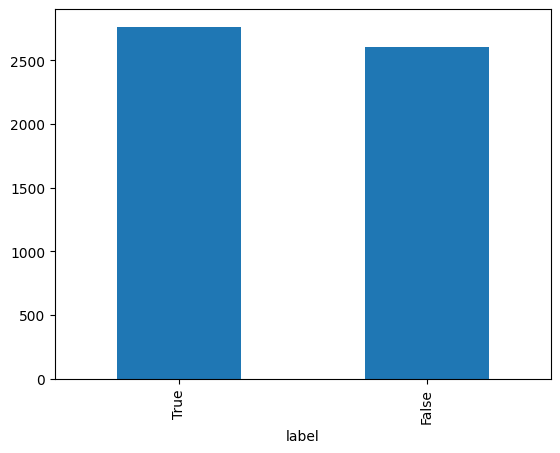

In [35]:
corpus_df['label'].value_counts().plot(kind='bar');

In [36]:
corpus_df.to_csv(BASE_DIR / 'data/raw_corpus/corpus_merged.csv', index=False)
corpus_df[~corpus_df['label']].to_csv(BASE_DIR / 'data/raw_corpus/falso_corpus.csv', index=False)
corpus_df[corpus_df['label']].to_csv(BASE_DIR / 'data/raw_corpus/verdadero_corpus.csv', index=False)

In [37]:
with open(BASE_DIR / 'data/raw_corpus/falso_corpus.txt', 'w', encoding='utf-8') as f:
    for noticia in corpus_falso:
        f.write(noticia.replace('\n', ' ') + '\n')
with open(BASE_DIR / 'data/raw_corpus/verdadero_corpus.txt', 'w', encoding='utf-8') as f:
    for noticia in corpus_verdadero:
        f.write(noticia.replace('\n', ' ') + '\n')